# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import pickle

![spotify_genre](https://community.spotify.com/t5/image/serverpage/image-id/27674iC82331350312CE8A/image-size/original?v=mpbl-1&px=-1)

### Import the Data And Overview of the Spotify Dataset

In [2]:
#import the Data 
spotify_df = pd.read_pickle("spotify_df.pkl")

In [3]:
# Change data types of the following Columns, duration_ms -> int, instrumentalness -> float, 
# key -> int, mode -> int, time_signature -> int
spotify_df = spotify_df.astype({'duration_ms': int, 'instrumentalness': float,'key': int,'mode': int,'time_signature': int})

In [33]:
spotify_df.head()

track_id            artist               artist_id  \
0  26auE2wH2FdGQWZf8aQ7G4            Halsey  26VFTg2z8YR0cCuwLzESi2   
1  4k0yY041y3wLd41uDjqROv            Halsey  26VFTg2z8YR0cCuwLzESi2   
2  2qxmye6gAegTMjLKEBoR3d     Alec Benjamin  5IH6FPUwQTxPSXurCrcIov   
3  2nMeu6UenVvwUktBCpLMK9      Lana Del Rey  00FQb4jTyendYWaN8pK0wa   
4  7i9AEaOWJrfVBsinUSefma  Melanie Martinez  63yrD80RY3RNEM2YDpUpO8   

                               album            trackName root genre  \
0  BADLANDS (Live From Webster Hall)               Castle        pop   
1  BADLANDS (Live From Webster Hall)             Gasoline        pop   
2                   Narrated For You   Let Me Down Slowly        pop   
3                Young And Beautiful  Young And Beautiful        pop   
4                               K-12            Detention        pop   

       sub genre  acousticness  danceability  duration_ms  ...  liveness  \
0  post-teen pop         0.252         0.627       277623  ...    0.0946   
1  post-teen pop         0.223         0.731       199593  ...    0.1290   
2  post-teen pop         0.740         0.652       169354  ...    0.1240   
3  post-teen pop         0.262         0.324       236053  ...    0.1100   
4  post-teen pop         0.488         0.832       236973  ...    0.1030   

   loudness  mode  speechiness    tempo  time_signature  valence  popularity  \
0    -7.461     0       0.0328  129.965               4    0.163          89   
1    -7.328     0       0.0399  120.001               4    0.319          89   
2    -5.714     0       0.0318  150.073               4    0.483          79   
3    -8.920     0       0.0368  113.986               4    0.151          85   
4    -6.195     0       0.0676   94.998               4    0.783          82   

                                  spotify_genre_list  \
0  ['dance pop', 'electropop', 'etherpop', 'indie...   
1  ['dance pop', 'electropop', 'etherpop', 'indie...   
2                              ['electropop', 'pop']   
3                                 ['art pop', 'pop']   
4                 ['dance pop', 'electropop', 'pop']   

                                              lyrics  
0  Sick of all these people talking, sick of all ...  
1  Are you insane like me? Been in pain like me?\...  
2  This night is cold in the kingdom\nI can feel ...  
3  I've seen the world, done it all\nHad my cake ...  
4  I'm not a bad guy\nSo don’t treat me bad if I'...  

[5 rows x 23 columns]

What are the names and types of the Columns

In [34]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26561 entries, 0 to 26560
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   track_id            26561 non-null  object 
 1   artist              26561 non-null  object 
 2   artist_id           26561 non-null  object 
 3   album               26561 non-null  object 
 4   trackName           26561 non-null  object 
 5   root genre          26561 non-null  object 
 6   sub genre           26561 non-null  object 
 7   acousticness        26561 non-null  float64
 8   danceability        26561 non-null  float64
 9   duration_ms         26561 non-null  int64  
 10  energy              26561 non-null  float64
 11  instrumentalness    26561 non-null  float64
 12  key                 26561 non-null  int64  
 13  liveness            26561 non-null  float64
 14  loudness            26561 non-null  float64
 15  mode                26561 non-null  int64  
 16  spee

In [35]:
spotify_df.describe()

acousticness  danceability    duration_ms        energy  \
count  26561.000000  26561.000000   26561.000000  26561.000000   
mean       0.132715      0.628717  233133.581981      0.725561   
std        0.194688      0.148830   57743.085683      0.178570   
min        0.000001      0.000000    6200.000000      0.018500   
25%        0.005910      0.531000  194787.000000      0.611000   
50%        0.042800      0.637000  223840.000000      0.751000   
75%        0.177000      0.736000  261987.000000      0.870000   
max        0.993000      0.986000  738053.000000      0.999000   

       instrumentalness           key      liveness      loudness  \
count      26561.000000  26561.000000  26561.000000  26561.000000   
mean           0.067210      5.330183      0.196399     -6.146734   
std            0.193350      3.580161      0.155424      2.756852   
min            0.000000      0.000000      0.000000    -25.764000   
25%            0.000000      2.000000      0.093600     -7.383000   
50%            0.000007      6.000000      0.134000     -5.610000   
75%            0.002500      8.000000      0.267000     -4.293000   
max            0.986000     11.000000      0.997000      1.244000   

               mode   speechiness         tempo  time_signature       valence  \
count  26561.000000  26561.000000  26561.000000    26561.000000  26561.000000   
mean       0.603441      0.107106    122.881335        3.968450      0.505753   
std        0.489192      0.102537     27.943805        0.260442      0.225350   
min        0.000000      0.000000      0.000000        0.000000      0.000000   
25%        0.000000      0.039600    100.069000        4.000000      0.332000   
50%        1.000000      0.061300    124.711000        4.000000      0.507000   
75%        1.000000      0.133000    139.904000        4.000000      0.678000   
max        1.000000      0.947000    219.981000        5.000000      0.985000   

         popularity  
count  26561.000000  
mean      60.700275  
std       22.451008  
min        0.000000  
25%       50.000000  
50%       66.000000  
75%       77.000000  
max      100.000000

#### Facts About the Dataset 

 1. There are 26561 rows, or tracks in the dataset 
 2. There is a total of 6 root genres, each root genre has 5 of the most popular sub_genres, These genres were selected using the [Every Noise Project](http://everynoise.com/)
     - Pop
         - post teen pop, dance pop, electropop, pop dance, indie pop
     - Rap
         - hip hop. souther hip hop, gangster rap, trap, dirty south rap
     - R&B
         - urban contemporary, new jack swing, neo soul, hip pop,pop r&b
     - Country 
         - Country road, contemporary county, moden country rock, country rock, country dawn 
     - Rock
         - album rock, classic rock, permanet wave, hard rock, modern rock
 3. Five playlists for the root genre and each sub genre were pulled each, 30 playlists per genre, aprox 180 total differnt playlists   
 4. Here are the folloing Features of the Dataset 
- track_id : a spotify primary key; unique for each track
- artist: name of artist
- album: name of album
- trackName: title of track
- acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
- danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable. 
- duration_ms: The duration of the track in milliseconds.
- energy: a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. 
- instrumentalness: Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context.
- key: The estimated overall key of the track. Integers map to pitches using standard [Pitch Class notation](https://en.wikipedia.org/wiki/Pitch_class) 
- liveness: Detects the presence of an audience in the recording.
- loudness: The overall loudness of a track in decibels (dB). 
- mode: indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
- speechiness: Speechiness detects the presence of spoken words in a track.
- tempo: BPM of track
- time_signature: An estimated overall time signature of a track. 
- valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. 
- category_id: The Spotify Category ID of the track 
- popularity: The value will be between 0 and 100, with 100 being the most popular. The artist’s popularity is calculated from the popularity of all the artist’s tracks.
- lyrics: A large string of song lyrics from the genius API

         

### Checking For Missing Values 

- During data collection, I know that not every song in the spotify playlists would have lirics found on the Genius API, lets check for missing values.

- Unfortunatly, songs without lrics are saved as a string "nan" and dont show up in the info() Null Count. We will have to filter them out manualy

In [4]:
df_filtered = spotify_df.loc[spotify_df.lyrics.apply(type) != float]

In [5]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23156 entries, 0 to 26560
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   track_id            23156 non-null  object 
 1   artist              23156 non-null  object 
 2   artist_id           23156 non-null  object 
 3   album               23156 non-null  object 
 4   trackName           23156 non-null  object 
 5   root genre          23156 non-null  object 
 6   sub genre           23156 non-null  object 
 7   acousticness        23156 non-null  float64
 8   danceability        23156 non-null  float64
 9   duration_ms         23156 non-null  int64  
 10  energy              23156 non-null  float64
 11  instrumentalness    23156 non-null  float64
 12  key                 23156 non-null  int64  
 13  liveness            23156 non-null  float64
 14  loudness            23156 non-null  float64
 15  mode                23156 non-null  int64  
 16  spee

In [6]:
#save filtered df as new df
df = df_filtered.copy()

### Answering General Questions About The Data


In [43]:
# How many unique artist?
df.artist.nunique()

5507

In [44]:
#What are the top 50 artists has the most tracks in the dataset?
df.artist.value_counts()[:50]

Various Artists                 665
Ludacris                        133
T.I.                            123
Lil Wayne                       120
Luke Combs                      106
Luke Bryan                      104
Britney Spears                   96
David Guetta                     91
Jason Aldean                     88
OutKast                          87
Jeezy                            83
Lady Gaga                        82
Katy Perry                       81
Rihanna                          77
Florida Georgia Line             72
Rick Ross                        71
Drake                            68
Nelly                            67
The Chainsmokers                 64
Kenny Chesney                    63
Thomas Rhett                     63
Three 6 Mafia                    60
The Weeknd                       59
Juvenile                         59
Three Days Grace                 58
50 Cent                          58
Nas                              57
Master P                    

/home/seanr/anaconda3/envs/spotify/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'Lil Wayne'),
  Text(1, 0, 'Ludacris'),
  Text(2, 0, 'T.I.'),
  Text(3, 0, 'Luke Combs'),
  Text(4, 0, 'Luke Bryan'),
  Text(5, 0, 'David Guetta'),
  Text(6, 0, 'Britney Spears'),
  Text(7, 0, 'Jason Aldean'),
  Text(8, 0, 'Lady Gaga'),
  Text(9, 0, 'Rihanna'),
  Text(10, 0, 'Katy Perry'),
  Text(11, 0, 'Drake'),
  Text(12, 0, 'Jeezy'),
  Text(13, 0, 'Florida Georgia Line'),
  Text(14, 0, 'OutKast'),
  Text(15, 0, 'Rick Ross'),
  Text(16, 0, 'Ariana Grande'),
  Text(17, 0, 'The Chainsmokers'),
  Text(18, 0, 'Nelly'),
  Text(19, 0, 'The Weeknd'),
  Text(20, 0, 'Thomas Rhett'),
  Text(21, 0, '50 Cent'),
  Text(22, 0, 'Kygo'),
  Text(23, 0, 'Taylor Swift'),
  Text(24, 0, 'Eminem')])

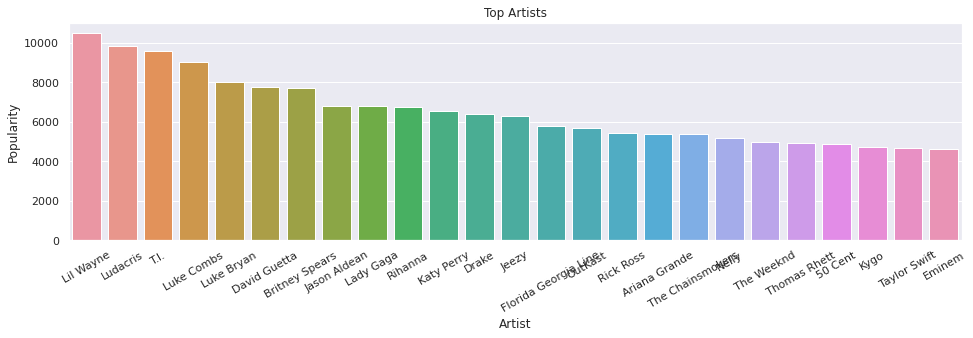

In [72]:
# Most Popular Artist 
plt.figure(figsize=(16, 4))
sns.set(font_scale = 1)
popular_artist = df.groupby("artist")["popularity"].sum().sort_values(ascending=False).head(25)
ax = sns.barplot(popular_artist.index, popular_artist)
ax.set_title('Top Artists')
ax.set_ylabel('Popularity')
ax.set_xlabel('Artist')
plt.xticks(rotation = 30)

In [45]:
#how many unique artists are there in each genre group?
df.groupby(['root genre']).agg('nunique')['artist']

root genre
country     640
edm        1339
pop        1316
r&b        1023
rap         912
rock       1373
Name: artist, dtype: int64

In [46]:
#how many unique tracks are there in each root genre? 
df.groupby(['root genre']).agg('nunique')['track_id']

root genre
country    2398
edm        3241
pop        3136
r&b        3260
rap        3361
rock       3825
Name: track_id, dtype: int64

In [48]:
#What is the mean number of unique tracks in each root genre?
df.groupby(['root genre']).agg('nunique')['track_id'].mean()

3203.5

#### Key Observation 
 - Country is significantly lower count of unique artists, and unique tracks across the genre:This could indicate the genre is less diverse or has a smaller pool of artists that dominate the market.
 - There is mean of 3203 unique tracks per genre. 


In [64]:
#lets look at mean values of all the features 
# What are the mean values of each genre
continuious_vars = ['acousticness', 'danceability','duration_ms', 'energy','liveness','loudness','speechiness','tempo','valence','popularity']
df.groupby('root genre')[continuious_vars].mean()

acousticness  danceability    duration_ms    energy  liveness  \
root genre                                                                  
country         0.203303      0.570799  213899.107421  0.709538  0.175795   
edm             0.051378      0.652159  224032.229527  0.819792  0.221196   
pop             0.147774      0.645597  213294.083826  0.718598  0.180246   
r&b             0.246841      0.663566  247378.500268  0.585351  0.179601   
rap             0.119125      0.733294  239753.471285  0.686007  0.211648   
rock            0.082143      0.499022  240354.323699  0.794149  0.194957   

            loudness  speechiness       tempo   valence  popularity  
root genre                                                           
country    -6.125598     0.043846  125.831062  0.582779   65.894075  
edm        -4.795102     0.106617  126.873986  0.417176   52.974625  
pop        -5.751151     0.076138  121.634630  0.507937   69.906892  
r&b        -7.909001     0.106384  113.371645  0.535681   59.214362  
rap        -6.235472     0.218572  120.384254  0.545087   66.804923  
rock       -6.152118     0.065005  127.626349  0.493460   64.508671

#### Key Observation 
 - As expected, pop is the most popular genre 
 - r&b has the longest tracks in run time, and the lowest mean tempo
 - rap is the most lyricaly dense by a large margin over other genres 
 - rap is also the most danceble 

### EDA: Continuious 

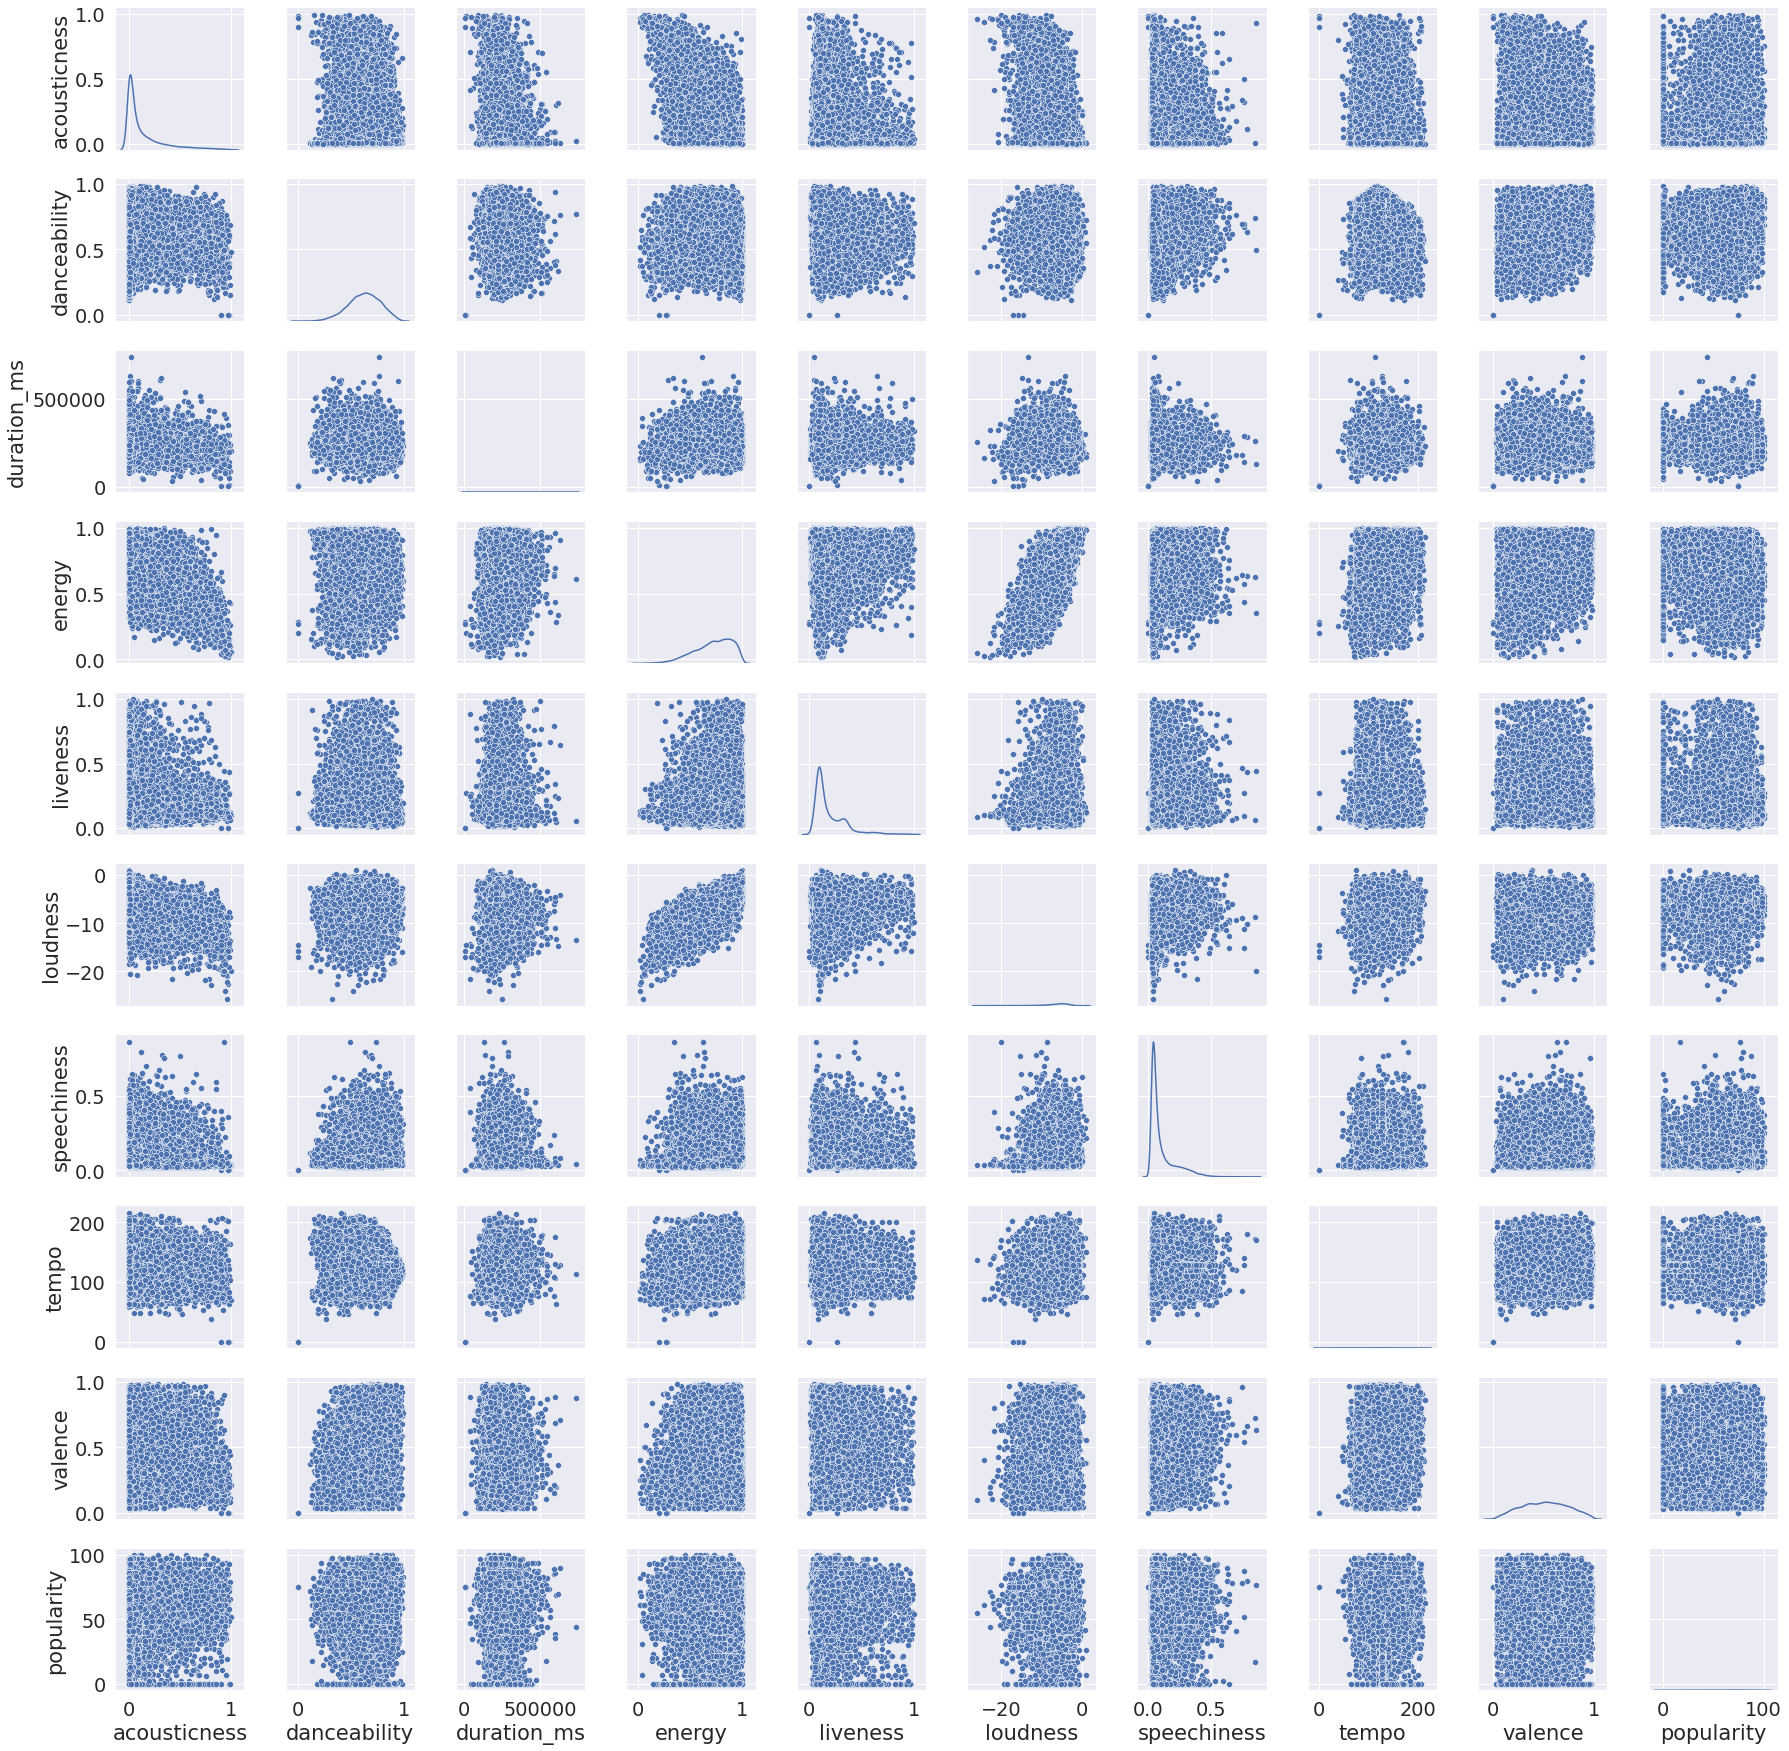

In [42]:
continuious_vars = ['acousticness', 'danceability','duration_ms', 'energy','liveness','loudness','speechiness','tempo','valence','popularity']
sns.set(font_scale = 1.75)
continuious_vars_pairs_plot = sns.PairGrid(df, vars = continuious_vars)
#continuious_vars_pairs_plot.map_diag(sns.kdeplot)
continuious_vars_pairs_plot.map_diag(sns.kdeplot)
continuious_vars_pairs_plot.map_offdiag(sns.scatterplot)
#continuious_vars_pairs_plot.fig.suptitle("Spotify Audio Features Pairs Plot")

Looking at the density plots of the continuous variables, there is strong evidence that there exists some outliers in the data set. Evidence of this can be seen in the density plot for track duration. We will remove these outliers and then test the pairwise relationships again.

### Removing Outliers 

In [7]:
Q1 = df.duration_ms.quantile(0.25)
Q3 = df.duration_ms.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

64547.25


In [8]:
df_drop_outlier = df[~((df.duration_ms < (Q1 - 1.5 * IQR)) |(df.duration_ms> (Q3 + 1.5 * IQR)))]
df_drop_outlier.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22493 entries, 0 to 26560
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   track_id            22493 non-null  object 
 1   artist              22493 non-null  object 
 2   artist_id           22493 non-null  object 
 3   album               22493 non-null  object 
 4   trackName           22493 non-null  object 
 5   root genre          22493 non-null  object 
 6   sub genre           22493 non-null  object 
 7   acousticness        22493 non-null  float64
 8   danceability        22493 non-null  float64
 9   duration_ms         22493 non-null  int64  
 10  energy              22493 non-null  float64
 11  instrumentalness    22493 non-null  float64
 12  key                 22493 non-null  int64  
 13  liveness            22493 non-null  float64
 14  loudness            22493 non-null  float64
 15  mode                22493 non-null  int64  
 16  spee

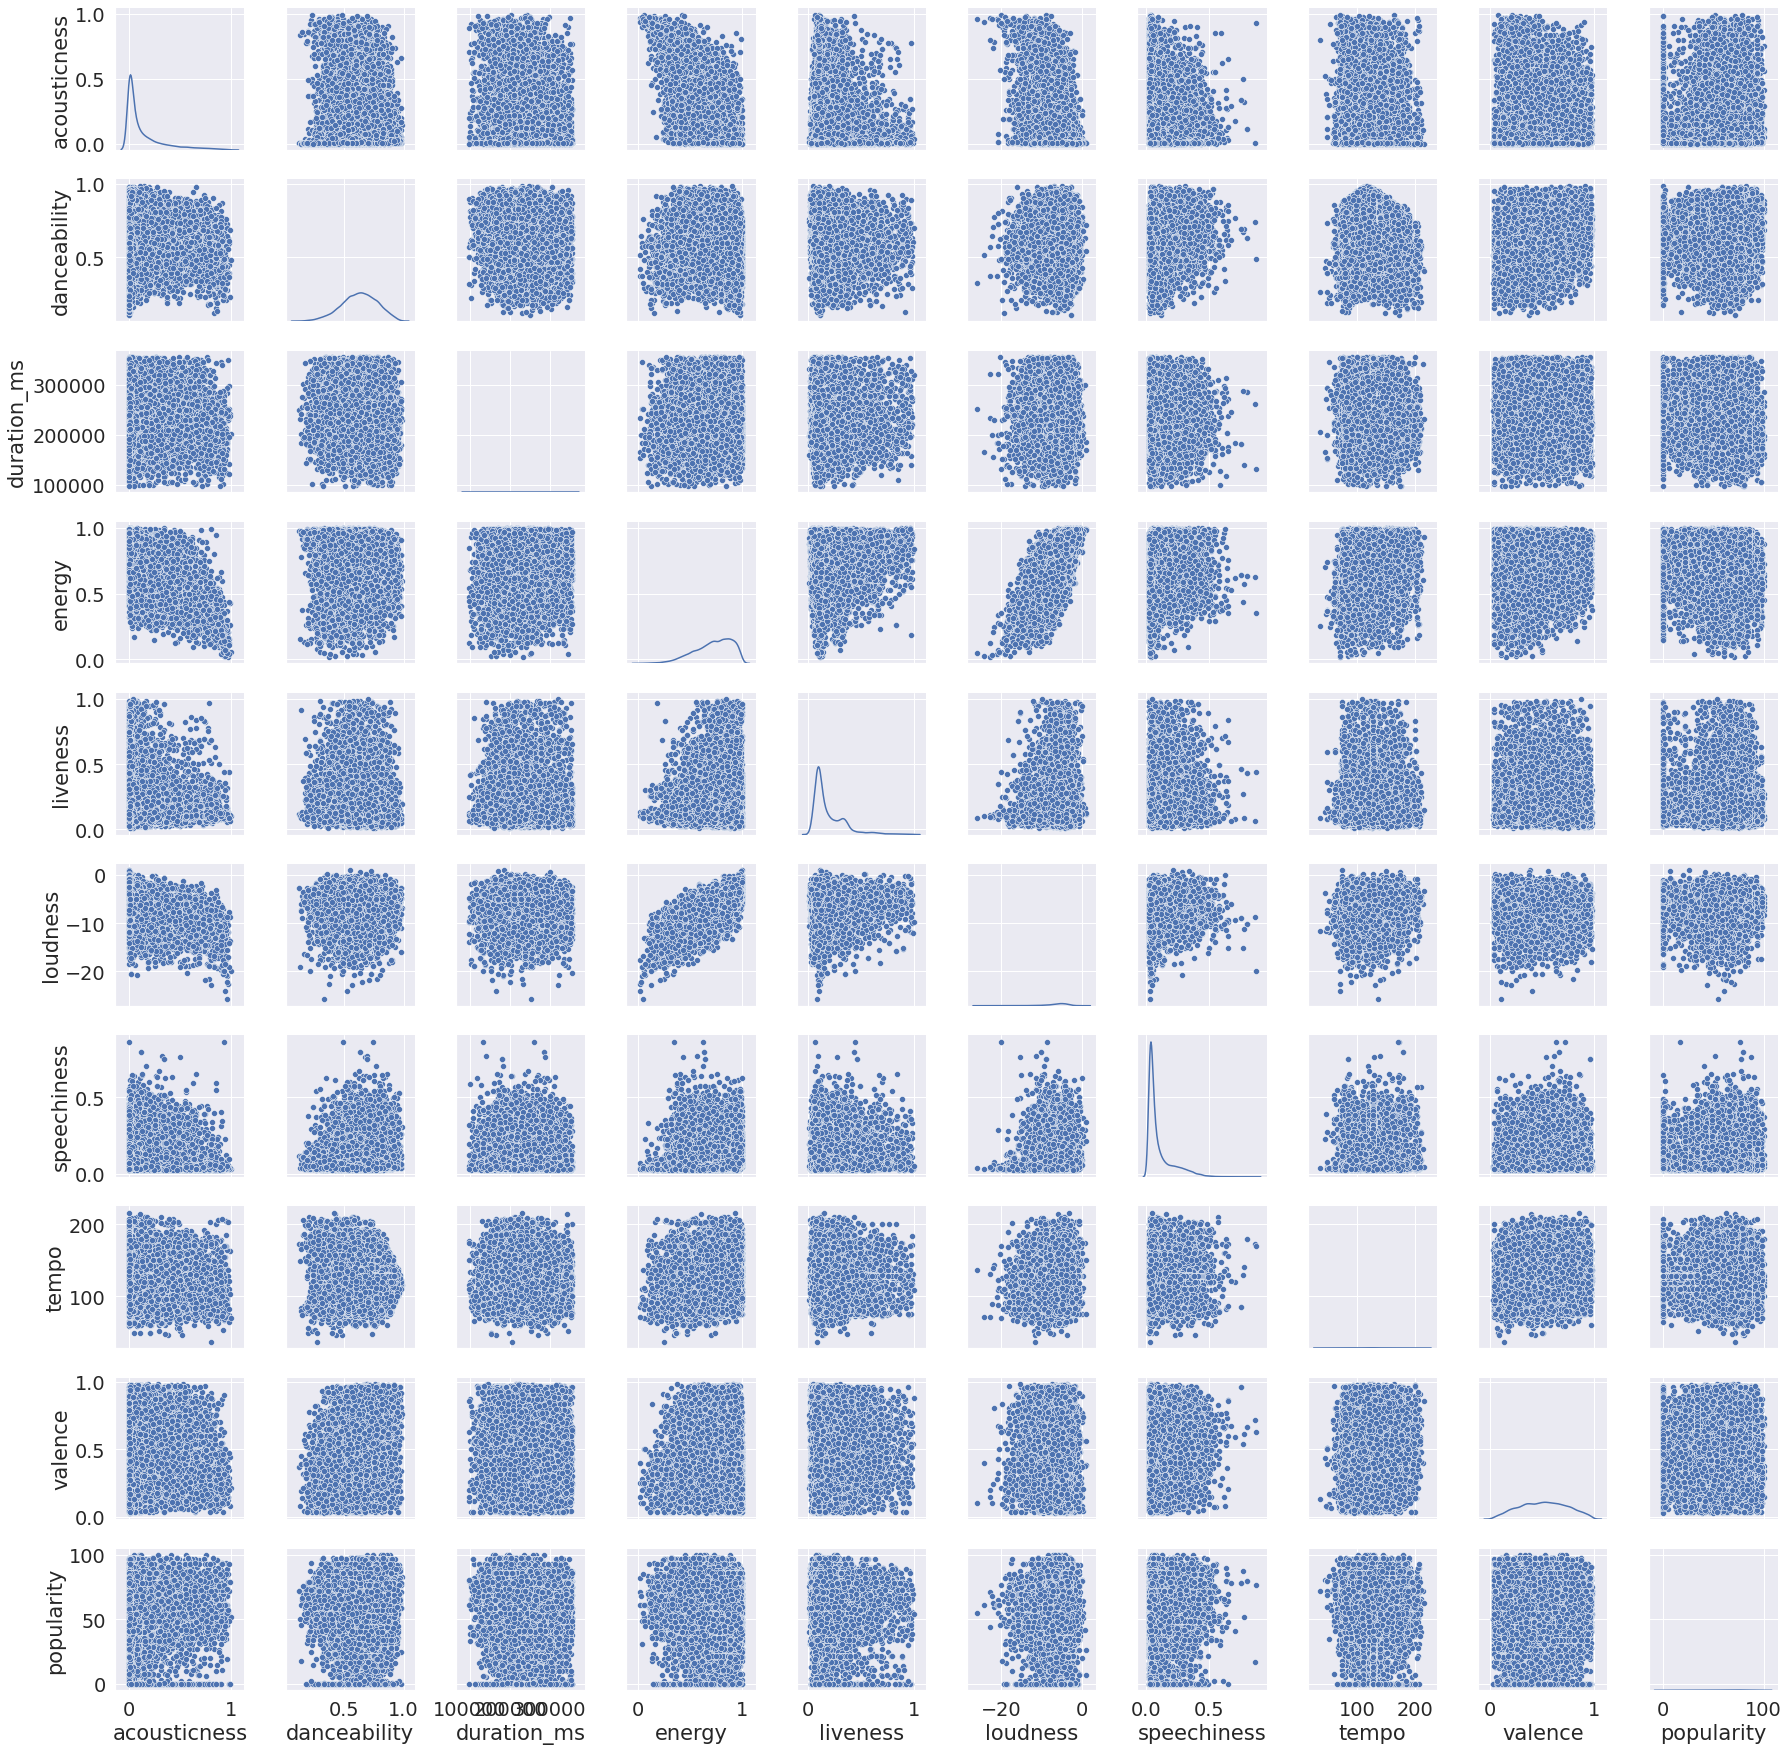

In [69]:
sns.set(font_scale = 1.75)
continuious_vars_pairs_plot = sns.PairGrid(df_drop_outlier, vars = continuious_vars)
continuious_vars_pairs_plot.map_diag(sns.kdeplot)
continuious_vars_pairs_plot.map_offdiag(sns.scatterplot)

In [65]:
#lets look at mean values of all the features 
# What are the mean values of each genre
continuious_vars = ['acousticness', 'danceability','duration_ms', 'energy','liveness','loudness','speechiness','tempo','valence','popularity']
df_drop_outlier.groupby('root genre')[continuious_vars].mean()

acousticness  danceability    duration_ms    energy  liveness  \
root genre                                                                  
country         0.203375      0.571576  212212.578804  0.710280  0.175623   
edm             0.052736      0.650867  217633.644119  0.822021  0.221828   
pop             0.148723      0.645797  210515.119646  0.718356  0.180345   
r&b             0.244702      0.667173  242565.860146  0.587851  0.177241   
rap             0.119161      0.733958  236556.899953  0.686573  0.210222   
rock            0.079287      0.501890  232794.109326  0.798578  0.195993   

            loudness  speechiness       tempo   valence  popularity  
root genre                                                           
country    -6.102398     0.043778  125.841715  0.584042   65.891002  
edm        -4.766005     0.105989  126.831258  0.418193   53.606106  
pop        -5.720310     0.076455  121.545195  0.509140   70.037407  
r&b        -7.816152     0.106519  113.613978  0.539391   59.394899  
rap        -6.222665     0.218549  120.448539  0.545701   66.822761  
rock       -6.028726     0.065357  127.675922  0.497134   64.440875

In [9]:
#save outlier removed df as new df
df = df_drop_outlier.copy()

### Checking Interaction between continuious varables 

Text(0.5, 1.0, 'Spotify Audio Features Correlation Matrix')

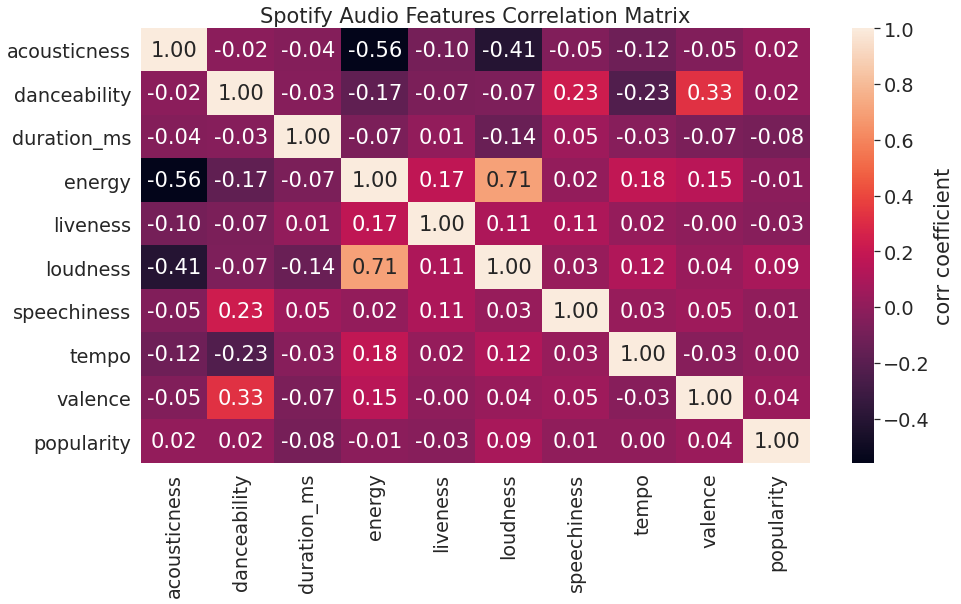

In [67]:
plt.figure(figsize=(15,8))
ax =sns.heatmap(df[continuious_vars].corr(),annot=True, fmt=".2f", cbar_kws={'label': 'corr coefficient'})
ax.set_title("Spotify Audio Features Correlation Matrix")


#### Key Observations 
 - Loudness and Energy have the highest positive correlation (0.71) across all songs, In Feature engineering we should look into removing one as they may be redundant
 - It makes intuitive sense that energy and acoustincess are negatively related (-0.56) as acoustic songs tend to be very mellow and chill in tone,
 - There is also a positive relationship between valence(the happiness of a song) and its danceability, so happier songs are more danceable
 - There does not appear to be much interaction with popularity, this may not be useful in the model.


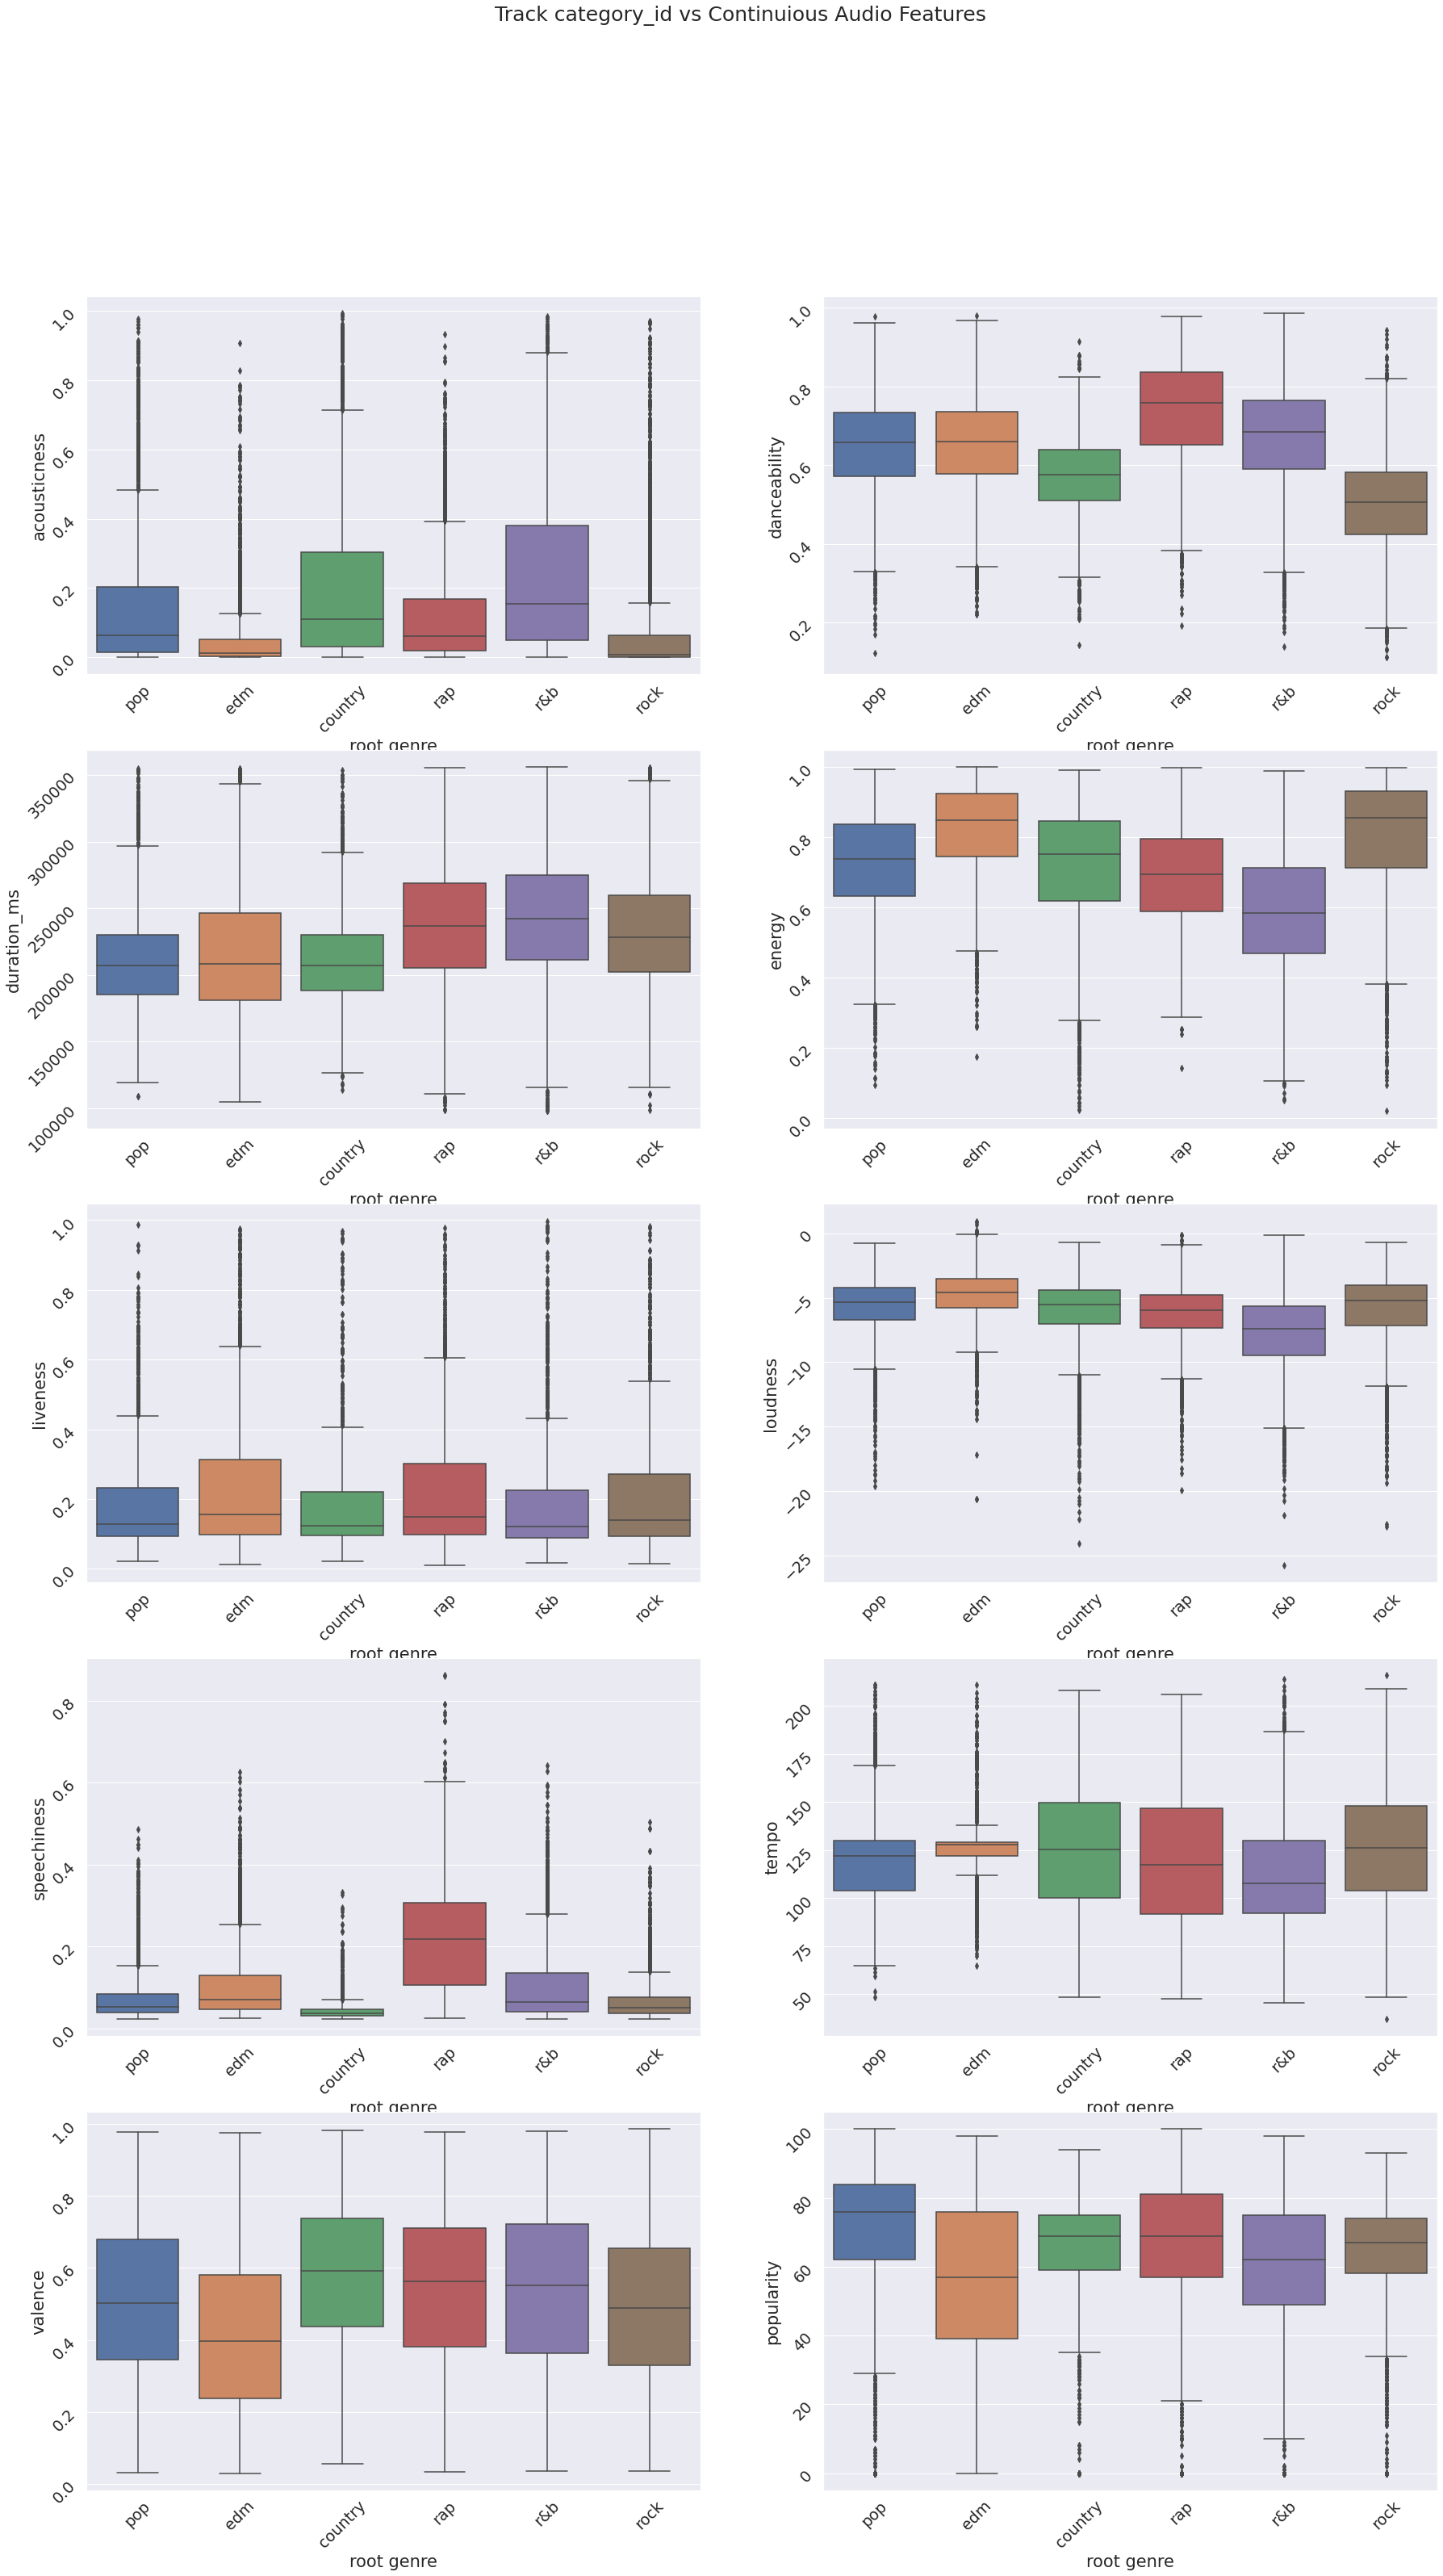

In [70]:
#How the Audio Features differ among the differnt spotify category_id
fig, axes = plt.subplots(5,2,figsize=(30, 50))
fig.suptitle("Track category_id vs Continuious Audio Features")

#acousticness
plt1 = sns.boxplot(ax = axes[0,0],data = df, x = "root genre", y = 'acousticness')

#danceability
plt2 = sns.boxplot(ax = axes[0,1],data = df, x = "root genre", y = 'danceability')

#duration_ms
plt3 = sns.boxplot(ax = axes[1,0],data = df, x = "root genre", y = 'duration_ms')

#energy
plt4 = sns.boxplot(ax = axes[1,1],data = df, x = "root genre", y = 'energy')

#liveness
plt5 = sns.boxplot(ax = axes[2,0],data = df, x = "root genre", y = 'liveness')

#loudness
plt6 = sns.boxplot(ax = axes[2,1],data = df, x = "root genre", y = 'loudness')

#speechiness
plt7 = sns.boxplot(ax = axes[3,0],data = df, x = "root genre", y = 'speechiness')

#tempo
plt8 = sns.boxplot(ax = axes[3,1],data = df, x = "root genre", y = 'tempo')

#valence
plt9 = sns.boxplot(ax = axes[4,0],data = df, x = "root genre", y = 'valence')

#popularity
plt10 = sns.boxplot(ax = axes[4,1],data = df, x = "root genre", y = 'popularity')

for ax in fig.axes:
    ax.tick_params(labelrotation=45)

## NLP for Lyrics 

### Cleaning and preparing the text data

In [13]:
import re

def process_text(textstr):
    # make all lyrics lowercase
    textstr = textstr.lower()
    #remove any HTML if some made it in
    textstr = re.sub('<[^>]*>','',textstr)
    #remove newline character
    textstr = re.sub('\n',' ', textstr)
    return textstr


    
#Clean all lyrics 
df['lyrics'] = df['lyrics'].apply(process_text)

In [14]:
#Convert the Lyric Strings into Tokens 
def tokenizer(textstr):
    return textstr.split()

df['lyrics_tokenize'] = df['lyrics'].apply(tokenizer)

In [15]:
#Removing StopWords 
#Words that would cause alot of noise in the data: "and, has, like"
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def rem_stop_words(text_vec):
    return [word for word in text_vec if not word in stop_words]

df['NLP_lyrics'] = df['lyrics_tokenize'].apply(rem_stop_words)

[nltk_data] Downloading package stopwords to /home/seanr/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
#Need to Run
#Stemming using NLTK PorterStemmer
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()
def stemming(text_vec):
    return [porter.stem(word) for word in text_vec]



df['lyrics_stemmed'] = df['NLP_lyrics'].apply(stemming)

In [28]:
#Lemmatiztion 
# Feature to add in future



In [77]:
df['NLP_lyrics']

0        [sick, people, talking,, sick, noise, tired, c...
1        [insane, like, me?, pain, like, me?, bought, h...
2        [night, cold, kingdom, feel, fade, away, kitch...
3        [i've, seen, world,, done, cake, diamonds,, br...
4        [i'm, bad, guy, don’t, treat, bad, i'm, feelin...
                               ...                        
26556    [back's, wall, there's, no-one, home, call, fo...
26557    [one, days, sky's, gonna, break, everything, e...
26558    [picked, slow, ritual, want, captain's, role, ...
26559    [am,, tied, bound, every, night, feeling, low,...
26560    [got, things, want, 'em, got, things, say, nev...
Name: NLP_lyrics, Length: 22493, dtype: object

In [17]:
df['lyrics_stemmed']

0        [sick, peopl, talking,, sick, nois, tire, came...
1        [insan, like, me?, pain, like, me?, bought, hu...
2        [night, cold, kingdom, feel, fade, away, kitch...
3        [i'v, seen, world,, done, cake, diamonds,, bri...
4        [i'm, bad, guy, don’t, treat, bad, i'm, feel, ...
                               ...                        
26556    [back', wall, there', no-on, home, call, forge...
26557    [one, day, sky', gonna, break, everyth, escap,...
26558    [pick, slow, ritual, want, captain', role, i'l...
26559    [am,, tie, bound, everi, night, feel, low, bad...
26560    [got, thing, want, 'em, got, thing, say, never...
Name: lyrics_stemmed, Length: 22493, dtype: object

#### EDA for Lyric Data

In [32]:

#extract genre vectors 
pop_lyrics = df.lyrics[df['root genre'] == 'pop']
rap_lyrics = df.lyrics[df['root genre'] == 'rap']
edm_lyrics = df.lyrics[df['root genre'] == 'edm']
rnb_lyrics = df.lyrics[df['root genre'] == 'r&b']
country_lyrics = df.lyrics[df['root genre'] == 'country']
rock_lyrics = df.lyrics[df['root genre'] == 'rock']

#flattten to one vector for the DTM
pop_lyrics_flatten = " ".join(pop_lyrics)
rap_lyrics_flatten = " ".join(rap_lyrics)
edm_lyrics_flatten = " ".join(edm_lyrics)
rnb_lyrics_flatten = " ".join(rnb_lyrics)
country_lyrics_flatten = " ".join(country_lyrics)
rock_lyrics_flatten = " ".join(rock_lyrics)

all_lycirs = pop_lyrics_flatten + " " + rap_lyrics_flatten + " " + edm_lyrics_flatten + " " + rnb_lyrics_flatten + " " + country_lyrics_flatten + " " + rock_lyrics_flatten 

lyric_dic = {
    'pop' : pop_lyrics_flatten,
    'rap' : rap_lyrics_flatten,
    'edm' : edm_lyrics_flatten,
    'r&b' : rnb_lyrics_flatten,
    'country' : country_lyrics_flatten,
    'rock' : rock_lyrics_flatten
}


In [27]:
from wordcloud import WordCloud
#Word Cloud Refrence 
#https://amueller.github.io/word_cloud/index.html
def draw_word_cloud(genre_corpus,genre):
    word_cloud = WordCloud(stopwords= stop_words,width=400, height=400, max_words=175,colormap='Pastel1').generate()



In [23]:
from wordcloud import WordCloud


word_cloud_pop = WordCloud(stopwords= stop_words,width=600, height=600, max_words=175,colormap='Pastel1').generate(pop_lyrics_flatten)
word_cloud_rap = WordCloud(stopwords= stop_words,width=600, height=600, max_words=175,colormap='Pastel1').generate(rap_lyrics_flatten)
word_cloud_edm = WordCloud(stopwords= stop_words,width=600, height=600, max_words=175,colormap='Pastel1').generate(edm_lyrics_flatten)
word_cloud_rnb = WordCloud(stopwords= stop_words,width=600, height=600, max_words=175,colormap='Pastel1').generate(rnb_lyrics_flatten)
word_cloud_country = WordCloud(stopwords= stop_words,width=600, height=600, max_words=175,colormap='Pastel1').generate(country_lyrics_flatten)
word_cloud_rock = WordCloud(stopwords= stop_words,width=600, height=600, max_words=175,colormap='Pastel1').generate(rock_lyrics_flatten)


In [33]:
word_cloud_all = WordCloud(stopwords= stop_words,width=1000, height=1000, max_words=175,colormap='Pastel1').generate(all_lycirs)
#'know','like','said','love','see'

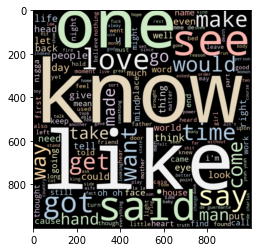

In [34]:
plt.imshow(word_cloud_all, interpolation='bilinear')
plt.show()


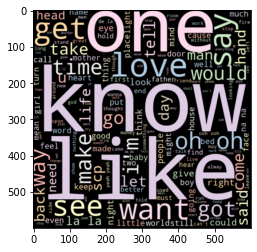

In [25]:
plt.imshow(word_cloud_pop, interpolation='bilinear')
plt.show()


In [ ]:
plt.imshow(word_cloud_rap, interpolation='bilinear')
plt.show()


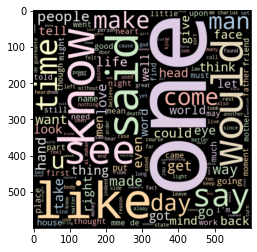

In [27]:
plt.imshow(word_cloud_edm, interpolation='bilinear')
plt.show()


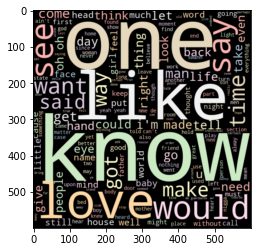

In [28]:
plt.imshow(word_cloud_rnb, interpolation='bilinear')
plt.show()


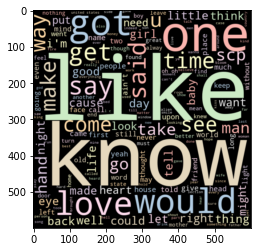

In [29]:
plt.imshow(word_cloud_country, interpolation='bilinear')
plt.show()


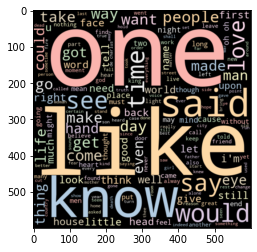

In [30]:
plt.imshow(word_cloud_rock, interpolation='bilinear')
plt.show()


### Key Obervastion 
- I clearly need to add more words to the NLTK stop words list. 
- Words that show up in all genres all the time 
- "one", "like", "know","see","love" 

### SAVE DATAFRAME 

In [22]:
df.to_pickle("spotify_df_prepared.pkl")

In [ ]:
# Wow its over a Gigabyte... whoops 